In [1]:
# import necessary python packages 
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read auto.csv dataset
header = 0
index_col = None
names = ['date', 'time', 'type', 'state', 'location', 'be']
# auto_df = pd.read_csv('dataset_modified.csv',index_col = index_col, header = header ,names = names)
auto_df = pd.read_csv('dataset_modified_v2.csv',index_col = 0)
# explore dtypes. Name is regarded as string object. Pandas recognizes it as non-numerical data 
# and automatically excludes this column from all the statistical analyses below. 

print(auto_df.dtypes)
# head and tail of the dataframe
auto_df

date        object
time        object
type        object
state       object
location    object
BE          object
dtype: object


,date,time,type,state,location,BE
0,02/02/2009,07:15:17,M35,ON,R1_Bed_to_Toilet,begin
1,02/02/2009,07:15:21,AD1-A,2.82231,NaN,NaN
2,02/02/2009,07:15:23,M35,OFF,NaN,NaN
3,02/02/2009,07:15:23,M35,ON,NaN,NaN
4,02/02/2009,07:15:28,AD1-A,2.79926,NaN,NaN
...,...,...,...,...,...,...
137869,04/04/2009,07:26:16,M48,OFF,NaN,NaN
137870,04/04/2009,07:27:47,M48,ON,NaN,NaN
137871,04/04/2009,07:27:50,M47,ON,NaN,NaN
137872,04/04/2009,07:27:59,M47,OFF,NaN,NaN


In [3]:
def fuze(auto_df):
    i0=[]
    name1 = ['R1_Bed_to_Toilet','R1_Personal_Hygiene', 'R2_Bed_to_Toilet',
           'Meal_Preparation', 'R2_Personal_Hygiene', 'Watch_TV', 'R1_Work',
           'R2_Work', 'R1_Sleep', 'R2_Sleep', 'Wash_Bathtub', 'Clean',
           'Study']
    for j in range(len(name1)):
        temp=[0,0]
        cnt = 0
        flag = 0
        for i in range(auto_df.shape[0] - 2):
            if auto_df['location'][i] == name1[j]:
                temp[cnt] = auto_df['BE'][i]
                i0.append(i)
                if cnt == 0:
                    cnt = 1
                else:
                    cnt = 0
                if temp[0] == 'end' and temp[1] == 'end':
                    print(name1[j], 'end error:',i0[-2], i)
                    for k in range(i0[-2] + 1, i-1):
                        if auto_df['location'][k] != 'NaN':
                            flag = 1
                            break
                    if flag == 1:
                        auto_df = auto_df.drop(i)
                    else:
                        auto_df = auto_df.drop(i0[-2])
                    auto_df = auto_df.reset_index(drop = True)
                    flag = 0;
                elif temp[0] == 'begin' and temp[1] == 'begin':
                    print(name1[j], 'begin error:',i0[-2], i)
                    for k in range(i0[-2] + 1, i-1):
                        if auto_df['location'][k] != 'NaN':
                            flag = 1
                            break
                    if flag == 1:
                        auto_df = auto_df.drop(i0[-2])
                    else:
                        auto_df = auto_df.drop(i)
                    auto_df = auto_df.reset_index(drop = True)
                    flag = 0;
                    
                    
    dic = {}
    for i in range(auto_df.shape[0]):
        if auto_df['location'][i] is not np.nan:
            if auto_df['location'][i] in dic:
                dic[auto_df['location'][i]].append(pd.to_datetime(auto_df['date'][i] + ' ' +  auto_df['time'][i],format = '%d/%m/%Y %H:%M:%S'))
                dic[auto_df['location'][i]+'_date'].append(auto_df['date'][i])
            else:
                dic[auto_df['location'][i]] = [pd.to_datetime(auto_df['date'][i] + ' ' + auto_df['time'][i],format = '%d/%m/%Y %H:%M:%S')]
                dic[auto_df['location'][i]+'_date'] = [auto_df['date'][i]]
    dic_delta = {}
    for i in name1:
        time = []
        for j in range(int(len(dic[i])/2)):
            time.append(((dic[i][2*j+1] - dic[i][2*j]).total_seconds())/3600)
        dic_delta[i] = time


    return [dic, dic_delta]

In [4]:
# # replace '?' with NaN and drop all of them. Then reset the index to have the observation numbered correctly
# auto_rp0 = auto_df.replace('ON', 1).reset_index(drop=True)
# auto_rp = auto_rp0.replace('OFF', 0).reset_index(drop=True)
# print('Number of observations: {}'.format(auto_nomiss.shape[0]))


[dic, dic_delta] = fuze(auto_df)
import copy
dic_temp = copy.deepcopy(dic)
dic_delta_temp = copy.deepcopy(dic_delta)
    # R2_Sleep_begin = []
    # R2_Sleep_end = []
    # R2_Sleep_begin_date = []
    # R2_Sleep_end_date = []
    # for i in range(len(dic['R2_Sleep'])):
    #     if i%2 == 0:
    #         R2_Sleep_begin.append(dic['R2_Sleep'][i])
    #         R2_Sleep_begin_date.append(dic['R2_Sleep_date'][i])
    #     else:
    #         R2_Sleep_end.append(dic['R2_Sleep'][i])
    #         R2_Sleep_end_date.append(dic['R2_Sleep_date'][i])

In [148]:
# a=dic['R2_Sleep'][1].day+1
# import datetime
# a = pd.Timestamp('2007-01-23', freq=None, tz=None, unit=None,year=None, month=None, day=None, hour=None, minute=None,second=None, microsecond=None, nanosecond=None, tzinfo=None)
# aa = dic['R2_Sleep'][1]+datetime.timedelta(1)
# dic['R2_Sleep'][1]
dic = copy.deepcopy(dic_temp)
dic_delta = copy.deepcopy(dic_delta_temp)
name1 = ['R1_Bed_to_Toilet','R1_Personal_Hygiene', 'R2_Bed_to_Toilet',
           'Meal_Preparation', 'R2_Personal_Hygiene', 'Watch_TV', 'R1_Work',
           'R2_Work', 'R1_Sleep', 'R2_Sleep', 'Wash_Bathtub', 'Clean',
           'Study']
for i in name1:
    date_time = []
    for j in range(len(dic[i])):
        if j % 2 != 0:
            date_time.append(dic[i][j])
    dic[i+'_date_time'] = date_time
# import datetime
# for i in name1:
#     for j in range(int(len(dic[i+'_date_time']))-1):
#         if dic[i+'_date_time'][j].day != dic[i+'_date_time'][j+1].day:
#             dic[i+'_date_time'].insert(j+1, dic[i+'_date_time'][j]+datetime.timedelta(1))



In [149]:
import datetime
Sleep = ['R1_Sleep', 'R2_Sleep']
for i in Sleep:
    cnt = 0
    for j in range(int((dic[i + '_date_time'][-1] - dic[i + '_date_time'][0]).total_seconds()/60/60//24)):
    # for j in range(int(len(dic[i+'_date_time']))):    
        # if dic[i+'_date_time'][j].day + 1 != dic[i+'_date_time'][j+1].day and dic[i+'_date_time'][j].day != 31:
        if (dic[i+'_date_time'][j] + datetime.timedelta(1)).day != dic[i+'_date_time'][j+1].day:
            cnt = cnt + 1
            dic[i+'_date_time'].insert(j+1, dic[i+'_date_time'][j]+datetime.timedelta(1))
            # dic_delta[i].insert(j+1, dic_delta[i][j])
            # print(dic[i+'_date_time'][j])
        else:
            if cnt > 0:
                for k in range(cnt):
                # dic_delta[i].insert(j+1, dic_delta[i][j])
                    # print(cnt, j - cnt + 1 + k,j - 2 * cnt + 1 + k) 
                    dic[i+'_date_time'][j - cnt +1 + k] = dic[i+'_date_time'][j - 2 * cnt + 1 + k]+datetime.timedelta(cnt)
                    dic_delta[i].insert(j - cnt + 1 + k, dic_delta[i][j - 2 * cnt + 1 + k])
#                 cnt = 0

In [150]:
for i in [name for name in name1 if name not in Sleep]:
    dic[i+'_morning_date_time'] = [];
    dic[i+'_night_date_time'] = [];
    dic_delta[i+'_morning'] = [];
    dic_delta[i+'_night'] = [];    
    for j in range(len(dic[i+'_date_time'])):
        if dic[i+'_date_time'][j].hour < 12:
            dic[i+'_morning_date_time'].append(dic[i+'_date_time'][j])
            dic_delta[i+'_morning'].append(dic_delta[i][j])
        else:
            dic[i+'_night_date_time'].append(dic[i+'_date_time'][j])
            dic_delta[i+'_night'].append(dic_delta[i][j])

In [151]:
import datetime
# for i in [name for name in name1 if name not in Sleep]:
for i in ['R1_Personal_Hygiene_morning', 'R1_Personal_Hygiene_night','R1_Bed_to_Toilet', 'R2_Bed_to_Toilet',
           'Meal_Preparation', 'R2_Personal_Hygiene_morning', 'R2_Personal_Hygiene_night','Meal_Preparation_night']:
# for i in ['R1_Personal_Hygiene', 'R1_Personal_Hygiene']:
    # location = {}
    print(i)
    cnt = 0
    # for j in range(int(len(dic[i+'_date_time'])) - 1): 
    #     date_cnt = 0
    #     if (dic[i+'_date_time'][j] + datetime.timedelta(1)).day != dic[i+'_date_time'][j+1].day\
    #     and dic[i+'_date_time'][j].day != dic[i+'_date_time'][j+1].day:
    #         while dic[i+'_date_time'][j - date_cnt].day >= - dic[i+'_date_time'][j+1].day + 2*dic[i+'_date_time'][j].day + 1:
    #             if j - date_cnt > 0:
    #                 date_cnt += 1
    #             else:
    #                 break
    #         location[j + 1] = date_cnt + 1
    j = 0
    while dic[i+'_date_time'][j] < dic[i+'_date_time'][-1]:
        date_cnt = 0
        rep_cnt = 0
        if (dic[i+'_date_time'][j] + datetime.timedelta(1)).day != dic[i+'_date_time'][j+1].day\
        and dic[i+'_date_time'][j].day != dic[i+'_date_time'][j+1].day:
            while dic[i+'_date_time'][j - date_cnt].day > - dic[i+'_date_time'][j+1].day + 2*dic[i+'_date_time'][j].day + 1 or (dic[i+'_date_time'][j]+ datetime.timedelta(date_cnt)).month < dic[i+'_date_time'][j+1].month :
                if j - date_cnt > 0:
                    date_cnt += 1
                else:
                    date_cnt = 1
                    break
            for k in range(date_cnt):
                # dic[i+'_date_time'].insert(j+1,dic[i+'_date_time'][j - k] + datetime.timedelta(dic[i+'_date_time'][j+1].day - dic[i+'_date_time'][j].day))             
                if dic[i+'_date_time'][j - k].day == dic[i+'_date_time'][j - k - 1].day:
                    rep_cnt += 1
            for k in range(date_cnt):
                dic[i+'_date_time'].insert(j+1,dic[i+'_date_time'][j - k] + datetime.timedelta(date_cnt - rep_cnt))  
                dic_delta[i].insert(j + 1, dic_delta[i][j - k])                
            j += date_cnt
        j += 1
    m = 0
    while dic[i+'_date_time'][m] < dic[i+'_date_time'][-1]:
        if dic[i+'_date_time'][m].day == dic[i+'_date_time'][m + 1].day:
            del dic[i+'_date_time'][m]
            del dic_delta[i][m]
        else:
            m += 1
    
    # for j in location:
    #     for k in range(location[j]):
    #         # print(j,k)
    #         dic[i+'_date_time'].insert(j+cnt, dic[i+'_date_time'][j + cnt - k - 1] + datetime.timedelta(location[j]))
    #         print(j+cnt, dic[i+'_date_time'][j + cnt - k - 1]+ datetime.timedelta(location[j]), location[j])            
    #     cnt = cnt + location[j]
            
#         if (dic[i+'_date_time'][j] + datetime.timedelta(1)).day != dic[i+'_date_time'][j+1].day:
#             cnt = cnt + 1
#             dic[i+'_date_time'].insert(j+1, dic[i+'_date_time'][j]+datetime.timedelta(1))
#             # dic_delta[i].insert(j+1, dic_delta[i][j])
#             # print(dic[i+'_date_time'][j])
#         else:
#             if cnt > 0:
#                 for k in range(cnt):
#                 # dic_delta[i].insert(j+1, dic_delta[i][j])
#                     # print(cnt, j - cnt + 1 + k,j - 2 * cnt + 1 + k) 
#                     dic[i+'_date_time'][j - cnt +1 + k] = dic[i+'_date_time'][j - 2 * cnt + 1 + k]+datetime.timedelta(cnt)
#                     dic_delta[i].insert(j - cnt + 1 + k, dic_delta[i][j - 2 * cnt + 1 + k])
# #                 cnt = 0

R1_Personal_Hygiene_morning
R1_Personal_Hygiene_night
R1_Bed_to_Toilet
R2_Bed_to_Toilet
Meal_Preparation
R2_Personal_Hygiene_morning
R2_Personal_Hygiene_night
Meal_Preparation_night


In [137]:
# dic['R1_Personal_Hygiene_morning_date_time'].insert(28,dic['R1_Personal_Hygiene_morning_date_time'][27]+datetime.timedelta(1))
# dic_delta['R1_Personal_Hygiene_morning'].insert(28,dic_delta['R1_Personal_Hygiene_morning'][27])

In [142]:
print(len(dic['Meal_Preparation_date_time']), len(dic_delta['Meal_Preparation']))
print(int((dic['R1_Personal_Hygiene_date_time'][-1] - dic['R1_Personal_Hygiene_date_time'][0]).total_seconds()/60/60//24))
print(cnt)
dic['R1_Personal_Hygiene_morning_date_time']


59 59
59
0


[Timestamp('2009-02-02 07:38:34'),
 Timestamp('2009-02-03 07:38:34'),
 Timestamp('2009-02-04 07:46:36'),
 Timestamp('2009-02-05 07:46:36'),
 Timestamp('2009-02-06 07:54:02'),
 Timestamp('2009-02-07 07:46:36'),
 Timestamp('2009-02-08 07:54:02'),
 Timestamp('2009-02-09 08:09:05'),
 Timestamp('2009-02-10 11:56:08'),
 Timestamp('2009-02-11 07:46:36'),
 Timestamp('2009-02-12 07:54:02'),
 Timestamp('2009-02-13 07:46:36'),
 Timestamp('2009-02-14 07:54:02'),
 Timestamp('2009-02-15 08:09:05'),
 Timestamp('2009-02-16 11:56:08'),
 Timestamp('2009-02-17 08:55:08'),
 Timestamp('2009-02-18 08:07:35'),
 Timestamp('2009-02-19 07:12:15'),
 Timestamp('2009-02-20 06:02:00'),
 Timestamp('2009-02-21 07:12:15'),
 Timestamp('2009-02-22 06:02:00'),
 Timestamp('2009-02-23 08:35:23'),
 Timestamp('2009-02-24 09:15:17'),
 Timestamp('2009-02-25 08:02:45'),
 Timestamp('2009-02-26 09:11:18'),
 Timestamp('2009-02-27 08:07:34'),
 Timestamp('2009-02-28 09:11:18'),
 Timestamp('2009-03-01 08:07:34'),
 Timestamp('2009-03-

In [140]:
dic['Clean']

[Timestamp('2009-02-06 17:16:01'),
 Timestamp('2009-02-06 17:48:23'),
 Timestamp('2009-02-26 20:40:55'),
 Timestamp('2009-02-26 20:58:18')]

In [85]:
a = 10
b = a
a = 11
a = b
print(a)

10


In [8]:
# dic = {}
# for i in range(auto_df.shape[0]):
#     if auto_df['location'][i] is not np.nan:
#         if auto_df['location'][i] in dic:
#             dic[auto_df['location'][i]].append(pd.to_datetime(auto_df['date'][i] + ' ' +  auto_df['time'][i],format = '%d/%m/%Y %H:%M:%S'))
#             dic[auto_df['location'][i]+'_date'].append(auto_df['date'][i])
#         else:
#             dic[auto_df['location'][i]] = [pd.to_datetime(auto_df['date'][i] + ' ' + auto_df['time'][i],format = '%d/%m/%Y %H:%M:%S')]
#             dic[auto_df['location'][i]+'_date'] = [auto_df['date'][i]]
# del dic['NaN']          

In [9]:
# a = auto_df['date'][0] +' '+ auto_df['time'][0]
# a1 = pd.to_datetime(a,format = '%d/%m/%Y %H:%M:%S')
# # a.astype({'object'}, copy=True)
# plt.plot(auto_df['date'][0], 4)
# plt.xticks(rotation='vertical')

In [10]:
R2_Sleep_begin = []
R2_Sleep_end = []
R2_Sleep_begin_date = []
R2_Sleep_end_date = []
for i in range(len(dic['R2_Sleep'])):
    if i%2 == 0:
        R2_Sleep_begin.append(dic['R2_Sleep'][i])
        R2_Sleep_begin_date.append(dic['R2_Sleep_date'][i])
    else:
        R2_Sleep_end.append(dic['R2_Sleep'][i])
        R2_Sleep_end_date.append(dic['R2_Sleep_date'][i])

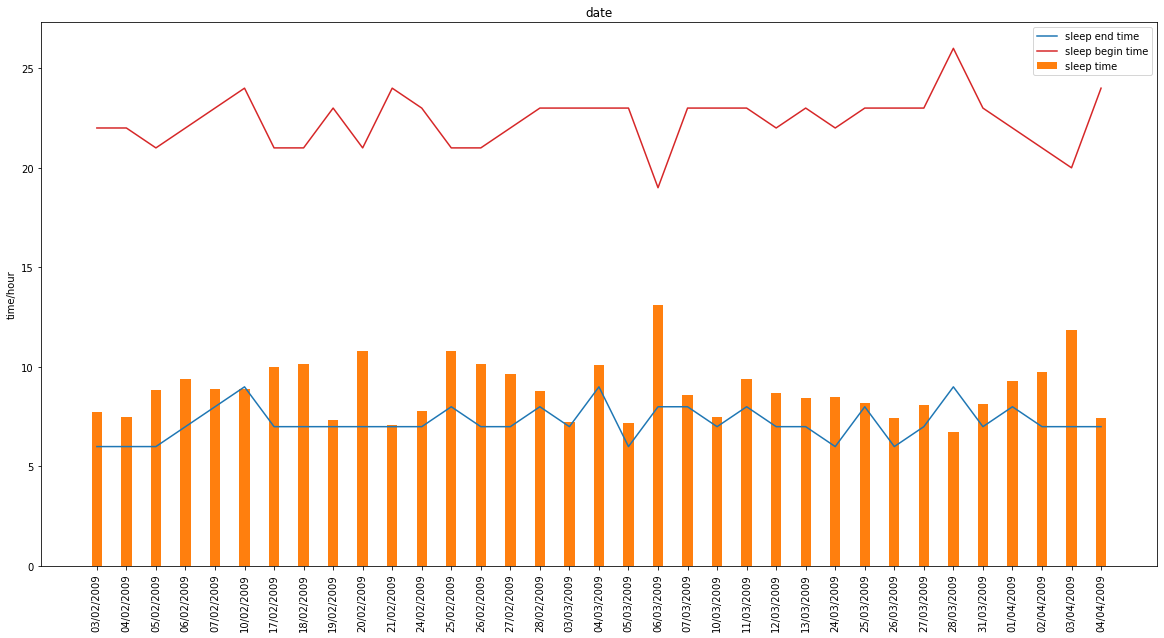

In [11]:
x1 = []
x2=[]
y1=[]
y2=[]
Sleep_delta = []
for i in range(len(R2_Sleep_begin)):
    y1.append(R2_Sleep_begin[i].hour)
    y2.append(R2_Sleep_end[i].hour)
    Sleep_delta.append(((dic['R2_Sleep'][2*i+1] - dic['R2_Sleep'][2*i]).total_seconds())/3600)

    if y1[i] < 12:
        y1[i] = + y1[i] + 24
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)
# ax.plot(R2_Sleep_begin_date, Sleep_delta, color='tab:blue')
# ax.plot(R2_Sleep_end_date, y2, color='tab:orange')
# ax.plot(R2_Sleep_end_date, y2, color='tab:orange')

fig, ax = plt.subplots(figsize = (20,10))

ax.bar(R2_Sleep_end_date, Sleep_delta, 0.35,  label = 'sleep time', color = 'tab:orange')
ax.plot(R2_Sleep_end_date, y2, color='tab:blue',label = 'sleep end time')
ax.plot(R2_Sleep_end_date, y1, color='tab:red', label = 'sleep begin time')
# ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
#        label='Women')
plt.xticks(rotation='vertical')
ax.set_ylabel('time/hour')
ax.set_title('date')
ax.legend()

plt.show()

In [187]:
import pandas as pd
import sklearn
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import linear_model, preprocessing

data = pd.read_csv('data_frequency2.csv')

le = preprocessing.LabelEncoder()
action = le.fit_transform(list(data['action']))
M35 = le.fit_transform(list(data['M35']))
AD1A = le.fit_transform(list(data['AD1-A']))
M34 = le.fit_transform(list(data['M34']))
M32 = le.fit_transform(list(data['M32']))
M33 = le.fit_transform(list(data['M33']))
M36 = le.fit_transform(list(data['M36']))
M30 = le.fit_transform(list(data['M30']))
M29 = le.fit_transform(list(data['M29']))
M37 = le.fit_transform(list(data['M37']))
M38 = le.fit_transform(list(data['M38']))
M39 = le.fit_transform(list(data['M39']))
M41 = le.fit_transform(list(data['M41']))
M40 = le.fit_transform(list(data['M40']))
M31 = le.fit_transform(list(data['M31']))
M10 = le.fit_transform(list(data['M10']))
M14 = le.fit_transform(list(data['M14']))
M16 = le.fit_transform(list(data['M16']))
M15 = le.fit_transform(list(data['M15']))
M17 = le.fit_transform(list(data['M17']))
M51 = le.fit_transform(list(data['M51']))
M18 = le.fit_transform(list(data['M18']))
AD1B = le.fit_transform(list(data['AD1-B']))
M09 = le.fit_transform(list(data['M09']))
D08 = le.fit_transform(list(data['D08']))
M45 = le.fit_transform(list(data['M45']))
M47 = le.fit_transform(list(data['M47']))
M48 = le.fit_transform(list(data['M48']))
M28 = le.fit_transform(list(data['M28']))
M27 = le.fit_transform(list(data['M27']))
M46 = le.fit_transform(list(data['M46']))
M49 = le.fit_transform(list(data['M49']))
M23 = le.fit_transform(list(data['M23']))
M19 = le.fit_transform(list(data['M19']))
M42 = le.fit_transform(list(data['M42']))
M08 = le.fit_transform(list(data['M08']))
M43 = le.fit_transform(list(data['M43']))
M13 = le.fit_transform(list(data['M13']))
M50 = le.fit_transform(list(data['M50']))
D14 = le.fit_transform(list(data['D14']))
M21 = le.fit_transform(list(data['M21']))
L11 = le.fit_transform(list(data['L11']))
M06 = le.fit_transform(list(data['M06']))
L06 = le.fit_transform(list(data['L06']))
M24 = le.fit_transform(list(data['M24']))
M25 = le.fit_transform(list(data['M25']))
AD1C = le.fit_transform(list(data['AD1-C']))
D15 = le.fit_transform(list(data['D15']))
D09 = le.fit_transform(list(data['D09']))
M07 = le.fit_transform(list(data['M07']))
M02 = le.fit_transform(list(data['M02']))
D10 = le.fit_transform(list(data['D10']))
I03 = le.fit_transform(list(data['I03']))
D07 = le.fit_transform(list(data['D07']))
M20 = le.fit_transform(list(data['M20']))
M11 = le.fit_transform(list(data['M11']))
D05 = le.fit_transform(list(data['D05']))
M05 = le.fit_transform(list(data['M05']))
M04 = le.fit_transform(list(data['M04']))
D03 = le.fit_transform(list(data['D03']))
M26 = le.fit_transform(list(data['M26']))
M01 = le.fit_transform(list(data['M01']))
M12 = le.fit_transform(list(data['M12']))
M03 = le.fit_transform(list(data['M03']))
M22 = le.fit_transform(list(data['M22']))
L09 = le.fit_transform(list(data['L09']))
D12 = le.fit_transform(list(data['D12']))
L10 = le.fit_transform(list(data['L10']))
L13 = le.fit_transform(list(data['L13']))
L12 = le.fit_transform(list(data['L12']))
L04 = le.fit_transform(list(data['L04']))

predict = 'action'
# 'M45' 'M47' 'M48' 'M28' 'M27' 'M46' 'M49' 'M23' 'M19' 'M42' 'M08' 'M43'
#'M44' 'M13' 'M50' 'D14' 'M21' 'L11' 'M06' 'L06' 'M24' 'M25' 'AD1-C' 'D15'
#'D09' 'M07' 'M02' 'D10' 'I03' 'D07' 'M20' 'M11' 'D05' 'M05' 'M04' 'D03'
#'M26' 'M01' 'M12' 'M03' 'M22' 'L09' 'D12' 'L10' 'L13' 'L12' 'L04'
#data['M35'], data['AD1-A'], data['M34'], data['M32'], data['M33'], data['M36'], data['M30'], data['M29'], data['M37'], data['M38'], data['M39'], data['M41'],
#data['M40'], data['M31'], data['M10'], data['M14'], data['M16'], data['M15'], data['M17'], data['M51'], data['M18'], data['AD1-B'], data['M09'], data['D08']
X = list(zip(M35, AD1A, M34, M32, M33, M36, M30, M29, M37, M38, M39, M41, M40, M31, M10, M14, M16, M15, M17, M51, M18, AD1B, M09, D08, M45,
             M47,M48,M28,M27,M46,M49,M23,M19,M42,M08,M43,M13,M50,D14,M21,L11,M06,L06,M24,M25,AD1C,D15,D09,M07,M02,D10,I03,D07,M20,M11,D05,
             M05,M04,D03,M26,M01,M12,M03,M22,L09,D12,L10,L13,L12,L04))
y = list(action)

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)
#print(x_train, y_test)
model = KNeighborsClassifier(n_neighbors=10)

model.fit(x_train, y_train)
acc = model.score(x_test, y_test)
print('KNN_ACC: ',acc)

# predicted = model.predict(x_test)
# names = ['R1_Bed_to_Toilet' 'R1_Personal_Hygiene' 'R2_Bed_to_Toilet'
#  'Meal_Preparation' 'R2_Personal_Hygiene' 'Watch_TV' 'R1_Work' 'R2_Work'
#  'R1_Sleep' 'R2_Sleep' 'Wash_Bathtub' 'Clean' 'Study']

KNN_ACC:  0.68


In [188]:
from sklearn import svm
clf = svm.SVC()
y = (list(data['action']))
clf.fit(x_train, y_train)
acc = clf.score(x_test, y_test)
# clf = svm.SVC(decision_function_shape='ovo')
print('SVC: ',acc)
predicted = clf.predict(x_test)

SVC:  0.65


In [167]:
clf.fit(X, y)
dec = clf.decision_function([[1]])

SVC(decision_function_shape='ovo')

In [161]:
for i in range(768,777):
    print(clf.predict([list(X[i])]))


['R1_Work']
['R1_Sleep']
['R1_Bed_to_Toilet']
['R1_Bed_to_Toilet']
['R2_Sleep']
['R1_Bed_to_Toilet']
['R2_Sleep']
['R1_Sleep']
['R2_Sleep']


In [156]:
# data1 = pd.read_csv('sensor_data.csv')
# column_names = data1['type'].unique()
# action_names = data1['location'].unique()
# print(action_names)

# data2 = np.zeros((1000, 71))
# df = pd.DataFrame(data2, columns=column_names)
# df['action'] = np.nan
# df.to_csv('sensor_frequency.csv')

# ind = 0
# a = 0
# dflist = []
# for m in range(0, len(column_names)-1):
#     for i in range(0, len(data1)):
#         if column_names[m] == data1['type'].iloc[i]:
#             a = a + 1
#             df[column_names[m]].iloc[ind] = a #frequency or appear
#             df.to_csv('sensor_frequency.csv')
#         if data1['BE'].iloc[i] == 'begin':#and (data['date'].iloc[i] == '02/02/2009')
#             counter1 = i
#             count = 1
#         if data1['BE'].iloc[i] == 'end':
#             counter2 = i
#             count = 2
#         if count == 2:
#             df['action'].iloc[ind] = data1['location'].iloc[i]
#             ind = ind + 1
#             df.to_csv('sensor_frequency.csv')
#             #dflist.append(df)
#             #appended_data = pd.concat(dflist)
#             #appended_data.to_csv('sensor_appear.csv')
#             count = 0
#             counter1 = 0
#             counter2 = 0
#             a = 0
#             print(df)
#     ind = 0

'''for m in range(len(column_names)):#column num
    for i in range(len(data1)): #observation num
        if column_names[m] == data1['type'].iloc[i]:
            ind = ind + 1
            df[column_names[m]].iloc[ind] = 1
            df['action'].iloc[ind] = data1['location'].iloc[i]
df.to_csv('sensor_appear.csv')'''

"for m in range(len(column_names)):#column num\n    for i in range(len(data1)): #observation num\n        if column_names[m] == data1['type'].iloc[i]:\n            ind = ind + 1\n            df[column_names[m]].iloc[ind] = 1\n            df['action'].iloc[ind] = data1['location'].iloc[i]\ndf.to_csv('sensor_appear.csv')"

In [12]:
Sleep_Pro = []
for i in range(len(dic['R2_Sleep'])):
    if i % 2 != 0:
        Sleep_Pro.append(dic['R2_Sleep'][i])


In [13]:
from prophet import Prophet

/Users/zhuhaoxiang/opt/anaconda3/envs/py38/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [14]:
# data = {'ds' : Sleep_Pro, 'y' : Sleep_delta}
# df = pd.DataFrame(data)
# df = pd.read_csv(examp.csv)

In [15]:
# m = Prophet()
# m.fit(df)

In [152]:
# future = m.make_future_dataframe(periods=7)
# future.tail()
dic['Meal_Preparation_night_date_time']

[Timestamp('2009-02-02 18:56:56'),
 Timestamp('2009-02-03 17:57:37'),
 Timestamp('2009-02-04 17:57:37'),
 Timestamp('2009-02-05 18:46:05'),
 Timestamp('2009-02-06 15:28:38'),
 Timestamp('2009-02-07 18:46:05'),
 Timestamp('2009-02-08 15:28:38'),
 Timestamp('2009-02-09 18:45:30'),
 Timestamp('2009-02-10 20:08:09'),
 Timestamp('2009-02-11 16:12:04'),
 Timestamp('2009-02-12 20:28:47'),
 Timestamp('2009-02-13 21:49:07'),
 Timestamp('2009-02-14 16:12:04'),
 Timestamp('2009-02-15 20:28:47'),
 Timestamp('2009-02-16 21:49:07'),
 Timestamp('2009-02-17 18:38:18'),
 Timestamp('2009-02-18 20:29:23'),
 Timestamp('2009-02-19 18:38:29'),
 Timestamp('2009-02-20 18:25:55'),
 Timestamp('2009-02-21 18:38:29'),
 Timestamp('2009-02-22 18:25:55'),
 Timestamp('2009-02-23 17:51:37'),
 Timestamp('2009-02-24 16:49:12'),
 Timestamp('2009-02-25 19:45:15'),
 Timestamp('2009-02-26 19:11:38'),
 Timestamp('2009-02-27 19:11:38'),
 Timestamp('2009-02-28 19:13:00'),
 Timestamp('2009-03-02 17:46:21'),
 Timestamp('2009-03-

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/Users/zhuhaoxiang/opt/anaconda3/envs/py38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -56.193
Iteration  1. Log joint probability =    4.37863. Improved by 60.5716.
Iteration  2. Log joint probability =    38.3217. Improved by 33.9431.
Iteration  3. Log joint probability =    43.9337. Improved by 5.61204.
Iteration  4. Log joint probability =    45.8385. Improved by 1.90473.
Iteration  5. Log joint probability =    45.8554. Improved by 0.0169243.
Iteration  6. Log joint probability =    45.8691. Improved by 0.0137133.
Iteration  7. Log joint probability =    45.9165. Improved by 0.0474043.
Iteration  8. Log joint probability =    45.9799. Improved by 0.0633457.
Iteration  9. Log joint probability =    46.0311. Improved by 0.0512816.
Iteration 10. Log joint probability =    46.1132. Improved by 0.0820702.
Iteration 11. Log joint probability =    46.3431. Improved by 0.229892.
Iteration 12. Log joint probability =    46.3558. Improved by 0.0127437.
Iteration 13. Log joint probability =    46.3878. Improved by 0.0319664.
Iteration 14. Log j

/Users/zhuhaoxiang/opt/anaconda3/envs/py38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/zhuhaoxiang/opt/anaconda3/envs/py38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/zhuhaoxiang/opt/anaconda3/envs/py38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/zhuhaoxiang/opt/anaconda3/envs/py38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pa

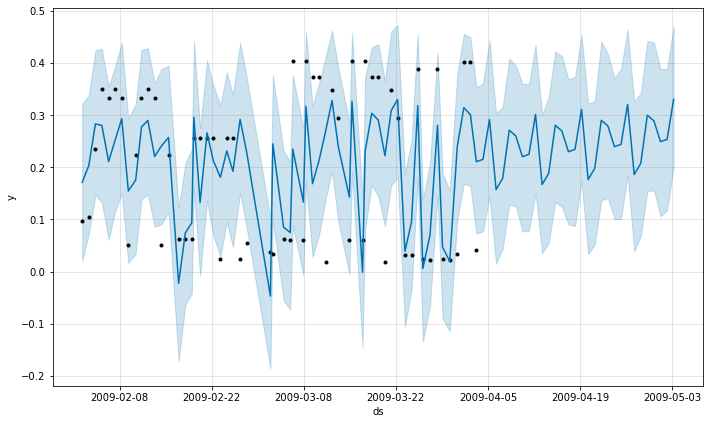

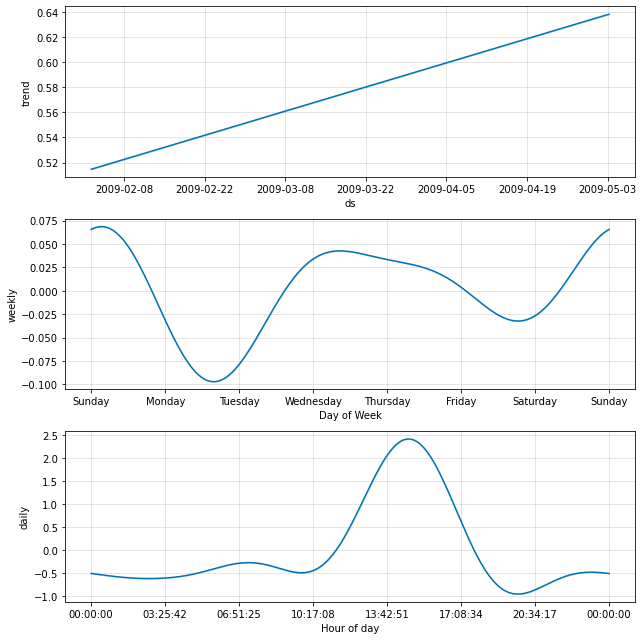

In [154]:
# Sleep_Pro = []
# for i in range(len(dic['R1_Sleep_dat'])):
#     if i % 2 != 0:
#         Sleep_Pro.append(dic['R1_Sleep'][i])
from prophet import Prophet
# data = {'ds' : dic['R1_Personal_Hygiene_morning_date_time'], 'y' : dic_delta['R1_Personal_Hygiene_morning']}
# data = {'ds' : dic['Meal_Preparation_night_date_time'], 'y' : dic_delta['Meal_Preparation_night']}
data = {'ds' : dic['R1_Bed_to_Toilet_date_time'], 'y' : dic_delta['R1_Bed_to_Toilet']}
df = pd.DataFrame(data)

m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=30)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)


In [132]:
get_up_time = []
for i in range(len(dic['R1_Sleep_date_time'])):
    a = dic['R1_Sleep_date_time'][i]
    get_up_time.append(a.hour+0.1*a.minute/60)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/Users/zhuhaoxiang/opt/anaconda3/envs/py38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -51.7538
Iteration  1. Log joint probability =    48.8501. Improved by 100.604.
Iteration  2. Log joint probability =    95.5228. Improved by 46.6727.
Iteration  3. Log joint probability =    133.112. Improved by 37.5891.
Iteration  4. Log joint probability =    163.941. Improved by 30.8289.
Iteration  5. Log joint probability =    180.982. Improved by 17.0411.
Iteration  6. Log joint probability =     186.38. Improved by 5.39805.
Iteration  7. Log joint probability =    199.022. Improved by 12.6418.
Iteration  8. Log joint probability =    199.047. Improved by 0.0252453.
Iteration  9. Log joint probability =    199.152. Improved by 0.104621.
Iteration 10. Log joint probability =    199.161. Improved by 0.00944856.
Iteration 11. Log joint probability =    199.251. Improved by 0.0901443.
Iteration 12. Log joint probability =     199.35. Improved by 0.0991198.
Iteration 13. Log joint probability =    199.385. Improved by 0.0345304.
Iteration 14. Log joint

/Users/zhuhaoxiang/opt/anaconda3/envs/py38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/zhuhaoxiang/opt/anaconda3/envs/py38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/zhuhaoxiang/opt/anaconda3/envs/py38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/zhuhaoxiang/opt/anaconda3/envs/py38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pa

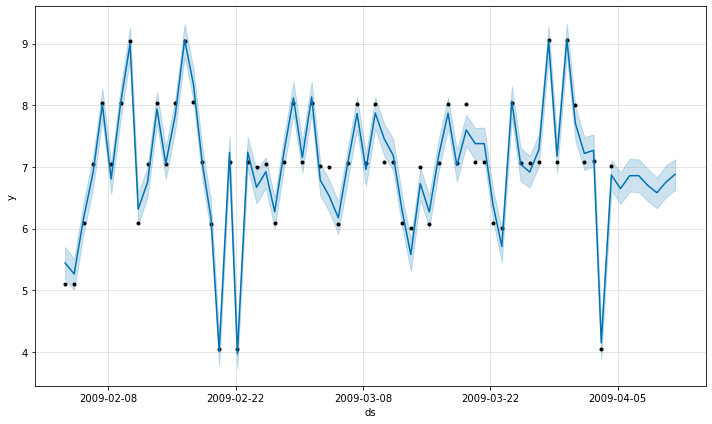

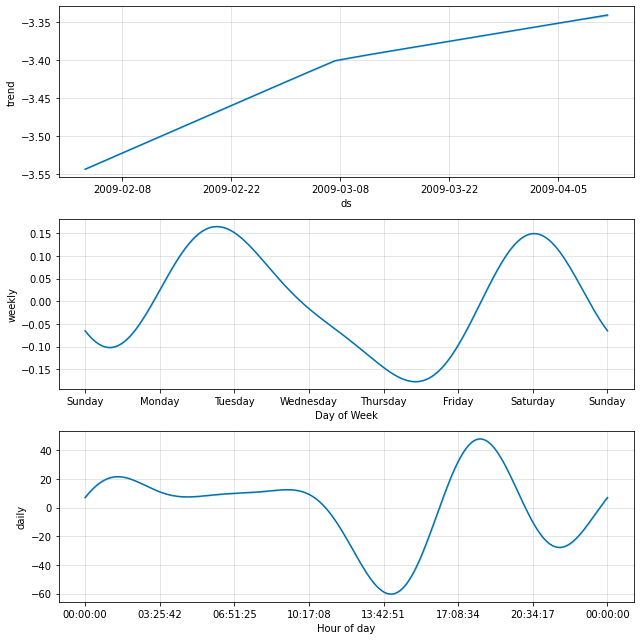

In [28]:
# Sleep_Pro = []
# for i in range(len(dic['R1_Sleep_dat'])):
#     if i % 2 != 0:
#         Sleep_Pro.append(dic['R1_Sleep'][i])
from prophet import Prophet
data = {'ds' : dic['R1_Sleep_date_time'], 'y' : get_up_time}
df = pd.DataFrame(data)

m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=7)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

In [21]:
# fig1 = m.plot(forecast)
# dic['R2_Sleep_date_time']

In [19]:
# fig2 = m.plot_components(forecast)

In [47]:
# read auto.csv dataset
header = 0
index_col = None
names = ['date', 'time', 'type', 'state', 'location', 'be']
# auto_df = pd.read_csv('dataset_modified.csv',index_col = index_col, header = header ,names = names)
example = pd.read_csv('example.csv',index_col = 0)
# explore dtypes. Name is regarded as string object. Pandas recognizes it as non-numerical data 
# and automatically excludes this column from all the statistical analyses below. 

# head and tail of the dataframe
example

,date,time,type,state,location,BE
0,02/02/2009,07:15:17,M35,ON,R1_Bed_to_Toilet,begin
1,02/02/2009,07:15:21,AD1-A,2.82231,NaN,NaN
2,02/02/2009,07:15:23,M35,OFF,NaN,NaN


In [ ]:
# cnt = 0
# i0 = []
# name1 = 'R1_Work'
# temp=[0,0]
# for i in range(0,138631):
#     if auto_df['location'][i] == name1:
#         cnt+=1
# cnt

In [ ]:
for i in range(example.shape[0]):
    if i == 1: 
        example.drop(labels = i,axis = 0,inplace = True)
example

In [ ]:
example.reset_index(drop = True)

In [26]:
# name1 = 'R1_Work'
# for i in range(0,138631):
#     if auto_df['location'][i] == name1:
#         print(auto_df.iloc[i], '\n')
     

In [87]:
439589/3600

122.10805555555555

In [23]:

data =pd.DataFrame(dict([(k, pd.Series(v)) for k, v in dic_delta.items()]))

In [24]:
data

,R1_Bed_to_Toilet,R1_Personal_Hygiene,R2_Bed_to_Toilet,Meal_Preparation,R2_Personal_Hygiene,Watch_TV,R1_Work,R2_Work,R1_Sleep,R2_Sleep,Wash_Bathtub,Clean,Study
0,0.096389,0.291667,0.045000,0.134722,0.433333,0.824444,3.138611,2.222778,7.774167,7.715000,0.551389,0.539444,2.151667
1,0.103889,0.108333,0.102778,0.367222,0.043889,1.150000,0.496944,1.133889,7.513333,7.493889,NaN,0.289722,0.546111
2,0.234167,0.065556,0.068889,1.160278,0.583333,2.314722,1.207222,1.798889,7.933889,8.838889,NaN,NaN,3.241389
3,0.350556,0.326944,0.042500,9.857222,0.572222,1.342778,1.711389,0.674722,8.366389,9.412778,NaN,NaN,0.655000
4,0.332222,0.327778,0.038611,0.644167,0.691667,3.805278,3.213056,1.521389,8.506389,8.914722,NaN,NaN,3.000556
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,NaN,NaN,NaN,0.587500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,NaN,NaN,NaN,0.171389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,NaN,NaN,NaN,0.231389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,NaN,NaN,NaN,0.615833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
data.to_csv('fuze.csv')